In [1]:
from seir_models import *
from seir_utils import *
import numpy as np
np.random.seed(42)

In [2]:
# === LOAD DATA ===
filepath = "epi_data_comparison/simulation_outputs/normal/output_luxembourg.csv"
initial_conditions, observed = extract_initial_conditions_and_observed(filepath)


In [3]:
times = np.arange(len(observed))

Maximising LogPDF
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 7
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
Iter. Eval. Best      Current   Time    
0     7     -9.69e+09 -9.69e+09   0:00.1
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
1     14    -5.64e+09 -5.64e+09   0:00.1
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
2     21    -2.44e+09 -2.44e+09   0:00.1
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
3     28    -2.44e+09 -3.58e+09   0:00.1
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1

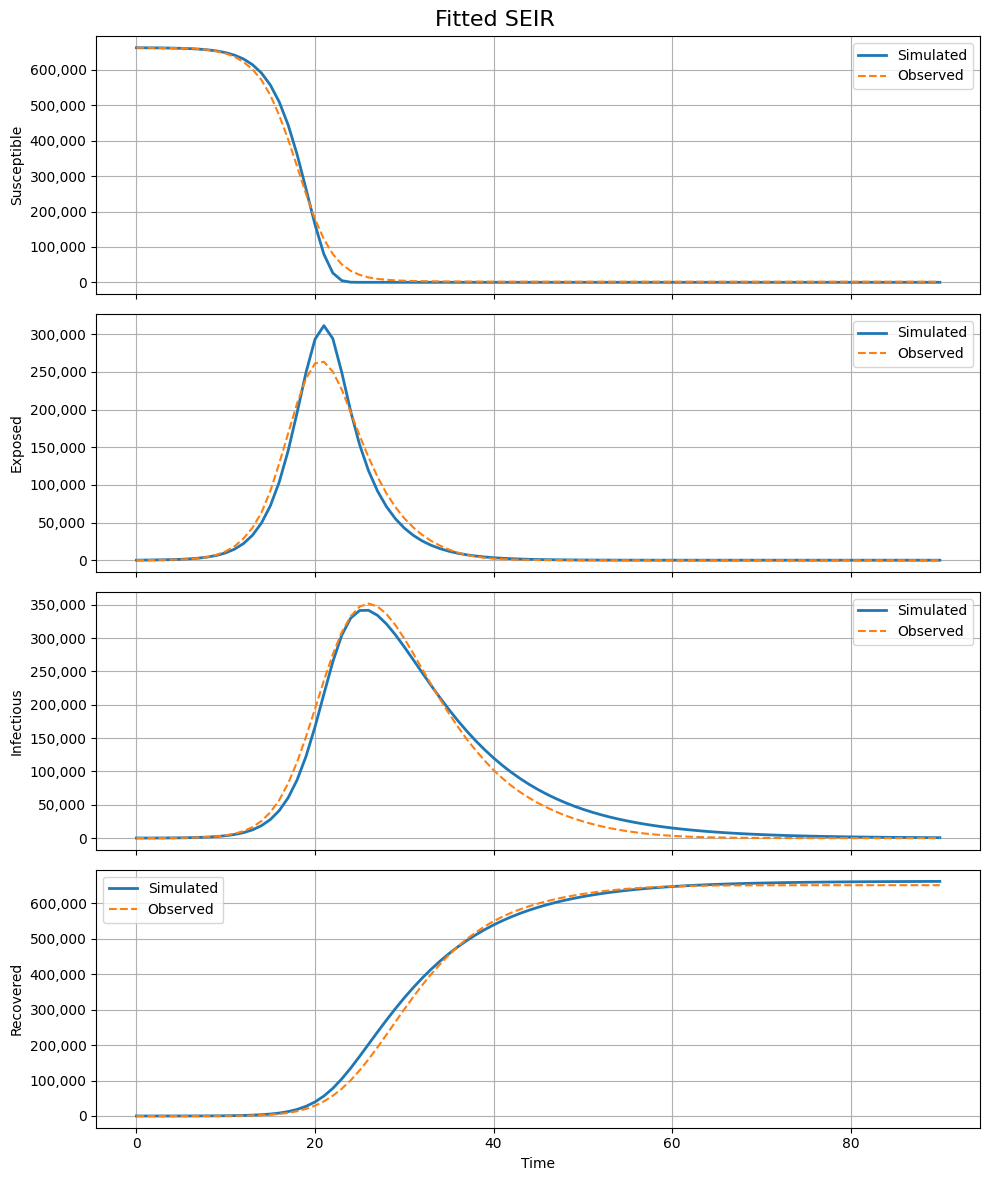

{'optimized_parameters': array([2.05118889, 0.22546231, 0.10045292]), 'log_posterior': -272318684.300343, 'R_estimate': 4.203446445801013, 'beta': 2.0511888909576124, 'kappa': 0.22546230597486866, 'gamma': 0.10045291954107337}


In [4]:

# Simple model
model = SimpleSEIRModel(initial_conditions)
result = model.fit_with_pints(times, observed, x0=[1.8, 1/5, 1/3])
print(result)


(91, 4)
[662754, 0, 100, 0]
Maximising LogPDF
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 10
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
Iter. Eval. Best      Current   Time    
0     10    -inf       nan        0:00.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
1     20    -inf       nan        0:00.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
2     30    -inf       nan        0:00.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
3     40    -inf       nan        0:00.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.0
dt is 1.

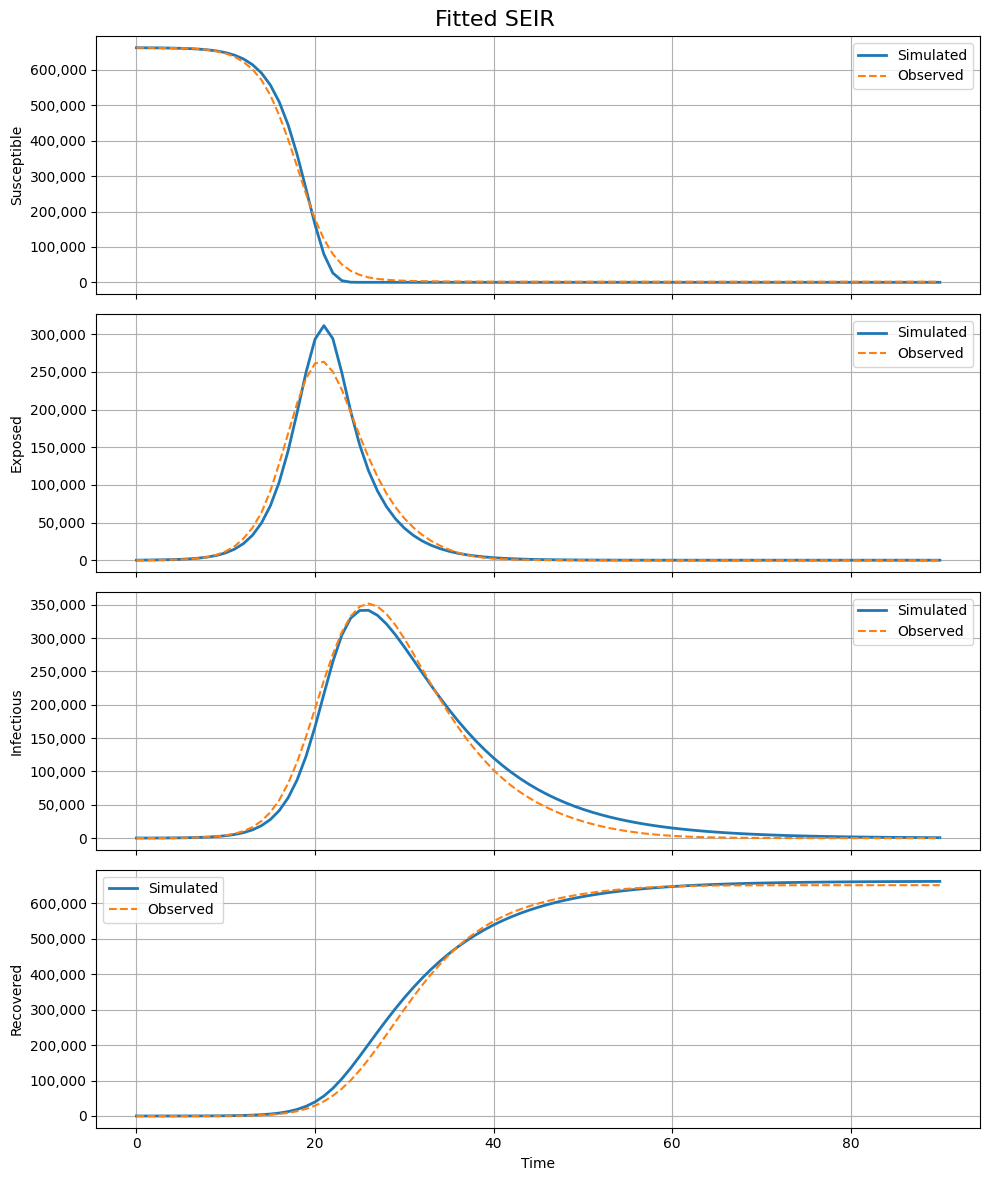

{'optimized_parameters': array([25.02149282,  0.09417265,  0.55866078, 48.54209885, 55.16370352,
        4.43533121,  2.48750559,  7.46740663]), 'log_posterior': -272318703.9638156, 'R_estimate': 4.203446439910724, 'beta': 6.188961353196452e-06, 'kappa': 0.22546230521725705, 'gamma': 0.10045291989207315}


In [13]:
# Roche model
model = RocheModel(initial_conditions)
print(observed.shape)
print(initial_conditions)
times = np.arange(91)
result = model.fit_with_pints(times, observed, x0=[35, 0.1, 1.2, 50, 60, 2.5, 10, 10])
print(result)

dt is 0.40160642570281124


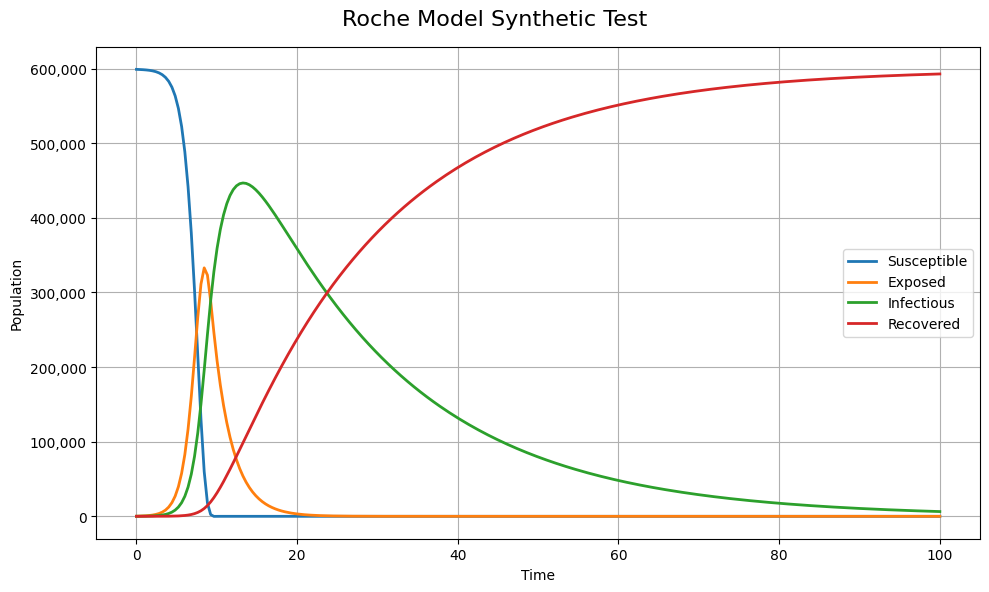

In [ ]:
# Minimal test without loading data
initial_conditions = [599000, 100, 100, 0]

times = np.linspace(0, 100, 250)
parameters = [
    35,      # C: scaling factor (unitless)
    0.135,    # beta_min: minimum daily infection rate
    1.08,     # beta_max: maximum infection rate (symptomatic, no mitigation)
    50,     # stringency index (%)
    60,     # max stringency (%)
    2.59,     # k: time to become infectious after exposure (days)
    10,     # k_s: time from infectiousness to symptom onset (days)
    10,      # k_ri: time to recover for asymptomatic/mild cases (days)
]


model = RocheModel(initial_conditions)
states = model.simulate(parameters, times)

model.plot(times, states, title="Roche Model Synthetic Test")

dt is 0.40080160320641284


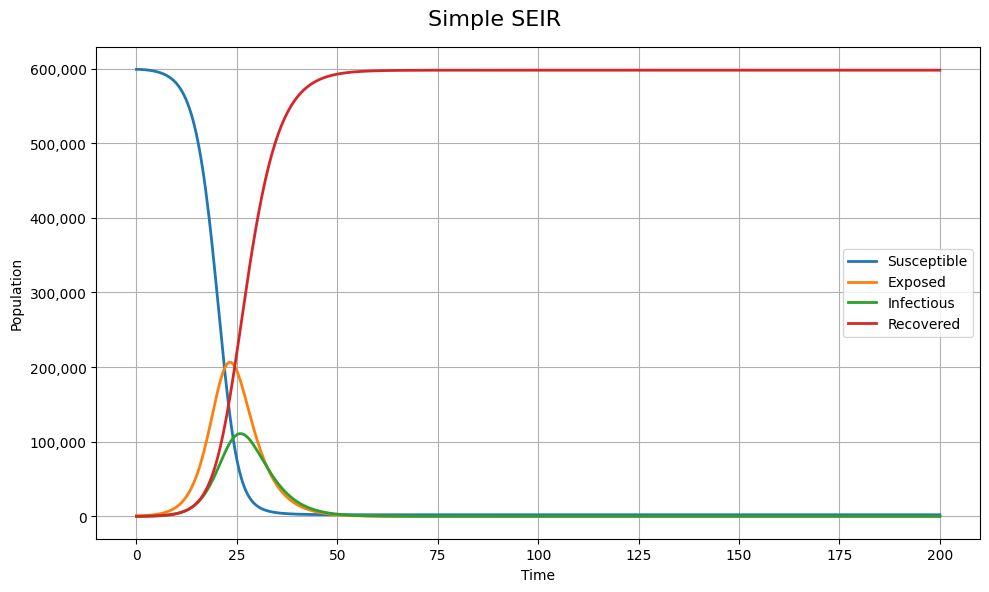

In [ ]:
model = SimpleSEIRModel(initial_conditions=[599000, 1000, 0, 0])
params = [1.8, 1/5, 1/3]
times = np.linspace(0, 200, 500)
sim = model.simulate(params, times)
model.plot(times, sim, title="Simple SEIR")